In [1]:
# Load libraries
from keplergl import KeplerGl
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # Import mpatches
import seaborn as sns

In [2]:
# Load data
demo = pd.read_csv('./data/BD_N4_ACTUALIZADO.csv')
demo.N4 = demo.N4.apply(lambda x : str(x).zfill(4) )
demo = demo[demo.Cen==1]
portugal_mun = gpd.read_file('data/desenvolvimento_sustentavel_mun.geojson')
portugal_mun = portugal_mun.drop(columns=['Sub-Índice Ambiental Dinâmico', 'Sub-Índice Económico Dinâmico',
       'Sub-Índice Social Dinâmico', 'Sub-Índice Institucional Dinâmico',
       'Índice Agregado Dinâmico', 'Sub-Índice Ambiental Estático',
       'Sub-Índice Económico Estático', 'Sub-Índice Social Estático',
       'Sub-Índice Institucional Estático', 'Índice Agregado Estático',
       'Financiamento Total (QREN + PT2020)',
       'Financiamento Total (QREN + PT2020) -  Per Capita', 'Eficiência CCR'])
portugal_mun = portugal_mun[~portugal_mun.NUTSI_COD.isin([2,3])]


In [3]:
demo[demo.N4=='1411']

,N3,N4,Ano,GE,PopAbertH,PopAbertM,PopFechH,PopFechM,Cen


In [4]:
# Check what scenario are the pessimist
demo[(demo.Ano==2030) & (demo.N4=='1601') & (demo.Cen == 1)].PopAbertM.sum()

10860

In [5]:
demo[(demo.Ano==2030) & (demo.N4=='1601') & (demo.Cen == 2)].PopAbertM.sum()

0

In [6]:
demo[(demo.Ano==2030) & (demo.N4=='1601') & (demo.Cen == 3)].PopAbertM.sum()

0

In [7]:
# check missing data
demo[demo.N4 =='0503']

,N3,N4,Ano,GE,PopAbertH,PopAbertM,PopFechH,PopFechM,Cen


In [8]:
# Create the base dataframe for demographic projections

sum_df = pd.DataFrame()  # Initialize an empty DataFrame
desired_years = [2010, 2030, 2040]


for year in desired_years:
    filtered_demo = demo[demo['Ano'].isin([year])]
    year_sum_df = filtered_demo.groupby('N4').sum()
    year_sum_df.drop(columns=['N3', 'GE', 'Ano', 'Cen'], inplace=True)
    year_sum_df['Total_Aberta_{}'.format(year)] = year_sum_df.PopAbertH + year_sum_df.PopAbertM
    year_sum_df['Total_Fechada_{}'.format(year)] = year_sum_df.PopFechH + year_sum_df.PopFechM
    year_sum_df.rename(columns={'PopAbertH': 'PopAbertH_{}'.format(year), 'PopAbertM': 'PopAbertM_{}'.format(year)}, inplace=True)
    year_sum_df.rename(columns={'PopFechH': 'PopFechH_{}'.format(year), 'PopFechM': 'PopFechM_{}'.format(year)}, inplace=True)

    if sum_df.empty:
        sum_df = year_sum_df
    else:
        sum_df = sum_df.merge(year_sum_df, on='N4', how='outer')

sum_df['ratio_2030'] = ((sum_df['Total_Aberta_2030'] / sum_df['Total_Aberta_2010']) -1)*100
sum_df['ratio_2040'] = ((sum_df['Total_Aberta_2040'] / sum_df['Total_Aberta_2010']) -1)*100
sum_df['ratio_2030'] = sum_df['ratio_2030'].round(2)
sum_df['ratio_2040'] = sum_df['ratio_2040'].round(2)
sum_df

,PopAbertH_2010,PopAbertM_2010,PopFechH_2010,PopFechM_2010,Total_Aberta_2010,Total_Fechada_2010,PopAbertH_2030,PopAbertM_2030,PopFechH_2030,PopFechM_2030,Total_Aberta_2030,Total_Fechada_2030,PopAbertH_2040,PopAbertM_2040,PopFechH_2040,PopFechM_2040,Total_Aberta_2040,Total_Fechada_2040,ratio_2030,ratio_2040
N4,,,,,,,,,,,,,,,,,,,,
0101,22891,24838,22891,24838,47729,47729,21868,24538,21339,23764,46406,45103,22070,25002,21507,24156,47072,45663,-2.77,-1.38
0102,12230,13022,12230,13022,25252,25252,11972,13146,11670,12709,25118,24379,12249,13636,11915,13132,25885,25047,-0.53,2.51
0103,13967,15183,13967,15183,29150,29150,12572,13992,12319,13607,26564,25926,12297,13756,12021,13346,26053,25367,-8.87,-10.62
0104,10799,11560,10799,11560,22359,22359,10461,11397,10183,10996,21858,21179,10747,11764,10468,11334,22511,21802,-2.24,0.68
0105,37120,41330,37120,41330,78450,78450,38361,43717,37053,41916,82078,78969,40139,46138,38773,44203,86277,82976,4.62,9.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,3900,4148,3900,4148,8048,8048,3540,4000,3468,3877,7540,7345,3421,4021,3343,3895,7442,7238,-6.31,-7.53
1821,13730,15216,13730,15216,28946,28946,12165,13841,11822,13372,26006,25194,11699,13395,11344,12916,25094,24260,-10.16,-13.31
1822,2463,2713,2463,2713,5176,5176,2262,2534,2186,2429,4796,4615,2269,2570,2183,2455,4839,4638,-7.34,-6.51


In [9]:
# Merge with refered data
portugal_mun_partial = portugal_mun.merge(sum_df, right_on=[sum_df.index], left_on=[portugal_mun.DTMN], how='left')

In [10]:
# Get all NaN values

list_of_missing_DTMN_data = list(portugal_mun_partial[portugal_mun_partial.ratio_2040.isna()].DTMN.unique())


# Define the file paths
file_paths = [
    'data/POP_FECHADAS_N5/BD_N5 111-117_ACTUALIZADO.csv',
    'data/POP_FECHADAS_N5/BD_N5 118-164_ACTUALIZADO.csv',
    'data/POP_FECHADAS_N5/BD_N5 165-193_ACTUALIZADO.csv',
    'data/POP_FECHADAS_N5/BD_N5 171-150_ACTUALIZADO.csv'
]

# Read the CSV files and store them in a list
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate the dataframes vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Format the 'N4' column as a string with 4 characters, filled with 0
combined_df['N4'] = combined_df['N4'].astype(str).str.zfill(4)


/tmp/ipykernel_457677/3462751041.py:17: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [11]:
filtered_df = combined_df[combined_df['N4'].isin(list_of_missing_DTMN_data)]


# Create the base dataframe for demographic projections

sum_df_freg = pd.DataFrame()  # Initialize an empty DataFrame
desired_years = [2010, 2030, 2040]


for year in desired_years:
    filtered_demo = filtered_df[filtered_df['Ano'].isin([year])]
    year_sum_df = filtered_demo.groupby('N4').sum()
    year_sum_df.drop(columns=['N3', 'GE', 'Ano', 'Cen'], inplace=True)
    year_sum_df['Total_Aberta_{}'.format(year)] = year_sum_df.PopAbertH + year_sum_df.PopAbertM
    year_sum_df['Total_Fechada_{}'.format(year)] = year_sum_df.PopFechH + year_sum_df.PopFechM
    year_sum_df.rename(columns={'PopAbertH': 'PopAbertH_{}'.format(year), 'PopAbertM': 'PopAbertM_{}'.format(year)}, inplace=True)
    year_sum_df.rename(columns={'PopFechH': 'PopFechH_{}'.format(year), 'PopFechM': 'PopFechM_{}'.format(year)}, inplace=True)

    if sum_df_freg.empty:
        sum_df_freg = year_sum_df
    else:
        sum_df_freg = sum_df_freg.merge(year_sum_df, on='N4', how='outer')

sum_df_freg['ratio_2030'] = ((sum_df_freg['Total_Aberta_2030'] / sum_df_freg['Total_Aberta_2010']) -1)*100
sum_df_freg['ratio_2040'] = ((sum_df_freg['Total_Aberta_2040'] / sum_df_freg['Total_Aberta_2010']) -1)*100
sum_df_freg['ratio_2030'] = sum_df_freg['ratio_2030'].round(2)
sum_df_freg['ratio_2040'] = sum_df_freg['ratio_2040'].round(2)


In [12]:
# Concat the two demographic dataframes
sum_df_freg.drop(columns=['N5_x', 'N5', 'N5_y'], inplace=True)

final_results = pd.concat([sum_df, sum_df_freg])

In [13]:
portugal_mun = portugal_mun.merge(final_results, right_on=[final_results.index], left_on=[portugal_mun.DTMN], how='left')

In [14]:
portugal_mun[portugal_mun.ratio_2040.isna()]

,key_0,DTMN,NUTSI_DSG,NUTSI_COD,NUTSII_DSG,NUTSII_COD,NUTSIII_DSG,NUTSIII_COD,DISTRITO_ILHA_DSG,CONCELHO_DSG,...,Total_Aberta_2030,Total_Fechada_2030,PopAbertH_2040,PopAbertM_2040,PopFechH_2040,PopFechM_2040,Total_Aberta_2040,Total_Fechada_2040,ratio_2030,ratio_2040


In [15]:
config = {
    "version": "v1",
    "config": {
        "visState": {
            "filters": [],
            "layers": [
                {
                    "id": "demographic_2030_2040_mun",
                    "type": "geojson",
                    "config": {
                        "dataId": "demographic_2030_2040_mun",
                        "label": "demographic_2030_2040_mun",
                        "color": [255, 203, 153],
                        "highlightColor": [252, 242, 26, 255],
                        "columns": {"geojson": "_geojson"},
                        "isVisible": True,
                        "visConfig": {
                            "opacity": 0.8,
                            "strokeOpacity": 0.8,
                            "thickness": 0.5,
                            "strokeColor": [227, 245, 212],
                            "colorRange": {
                                "name": "Ice And Fire 5",
                                "type": "diverging",
                                "category": "Uber",
                                "colors": ["#D50255", "#FEAD54", "#FAFEB3", "#49E3CE", "#0198BD"],
                                "reversed": True
                            },
                            "strokeColorRange": {
                                "name": "Global Warming",
                                "type": "sequential",
                                "category": "Uber",
                                "colors": ["#5A1846", "#900C3F", "#C70039", "#E3611C", "#F1920E", "#FFC300"]
                            },
                            "radius": 10,
                            "sizeRange": [0, 10],
                            "radiusRange": [0, 50],
                            "heightRange": [0, 500],
                            "elevationScale": 42.7,
                            "enableElevationZoomFactor": True,
                            "stroked": False,
                            "filled": True,
                            "enable3d": True,
                            "wireframe": False
                        },
                        "hidden": False,
                        "textLabel": [
                            {
                                "field": None,
                                "color": [255, 255, 255],
                                "size": 18,
                                "offset": [0, 0],
                                "anchor": "start",
                                "alignment": "center"
                            }
                        ]
                    },
                    "visualChannels": {
                        "colorField": {"name": "ratio_2040", "type": "real"},
                        "colorScale": "quantize",
                        "strokeColorField": None,
                        "strokeColorScale": "quantile",
                        "sizeField": None,
                        "sizeScale": "linear",
                        "heightField": {"name": "Total_Fechada_2040", "type": "integer"},
                        "heightScale": "linear",
                        "radiusField": None,
                        "radiusScale": "linear"
                    }
                }
            ],
            "interactionConfig": {
                "tooltip": {
                    "fieldsToShow": {
                        "demographic_2030_2040_mun": [
                            {"name": "DTMN", "format": None},
                            {"name": "CONCELHO_DSG", "format": None},
                            {"name": "ratio_2040", "format": None},
                            {"name": "Total_Fechada_2040", "format": None},
                            {"name": "NUTSIII_DSG", "format": None}
                        ]
                    },
                    "compareMode": False,
                    "compareType": "absolute",
                    "enabled": True
                },
                "brush": {"size": 0.5, "enabled": False},
                "geocoder": {"enabled": False},
                "coordinate": {"enabled": False}
            },
            "layerBlending": "normal",
            "splitMaps": [],
            "animationConfig": {"currentTime": None, "speed": 1}
        },
        "mapState": {
            "bearing": 24,
            "dragRotate": True,
            "latitude": 38.96260018127818,
            "longitude": -8.484866210937579,
            "pitch": 50,
            "zoom": 7.1993197684515255,
            "isSplit": False
        },
        "mapStyle": {
            "styleType": "dark",
            "topLayerGroups": {},
            "visibleLayerGroups": {
                "label": True,
                "road": True,
                "border": False,
                "building": True,
                "water": True,
                "land": True,
                "3d building": False
            },
            "threeDBuildingColor": [9.665468314072013, 17.18305478057247, 31.1442867897876],
            "mapStyles": {}
        }
    }
}

map = KeplerGl(height=600, width=800, config=config, data={"demographic_2030_2040_mun": portugal_mun})
map


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'demographic_2030_2…

In [16]:
portugal_mun.columns

Index(['key_0', 'DTMN', 'NUTSI_DSG', 'NUTSI_COD', 'NUTSII_DSG', 'NUTSII_COD',
       'NUTSIII_DSG', 'NUTSIII_COD', 'DISTRITO_ILHA_DSG', 'CONCELHO_DSG',
       'geometry', 'PopAbertH_2010', 'PopAbertM_2010', 'PopFechH_2010',
       'PopFechM_2010', 'Total_Aberta_2010', 'Total_Fechada_2010',
       'PopAbertH_2030', 'PopAbertM_2030', 'PopFechH_2030', 'PopFechM_2030',
       'Total_Aberta_2030', 'Total_Fechada_2030', 'PopAbertH_2040',
       'PopAbertM_2040', 'PopFechH_2040', 'PopFechM_2040', 'Total_Aberta_2040',
       'Total_Fechada_2040', 'ratio_2030', 'ratio_2040'],
      dtype='object')

In [17]:
portugal_mun.to_file('data/demographic_2030_2040_mun.geojson', driver='GeoJSON')

In [18]:
map.save_to_html(file_name='demographic_2030_2040_mun.html')

Map saved to demographic_2030_2040_mun.html!


In [19]:
# a pergunta a que queria responder é a seguinte:
# quantas pessoas terá (a mais ou a menos) cada uma destas partes do país, em 2040?

# Load density map data
high_density = gpd.read_file('data/polignos_alta_baixa_densidade/alta_densidade_corrigido.shp')
low_density = gpd.read_file('data/polignos_alta_baixa_densidade/baixa_densidade_poligno.shp')

In [20]:
# Convert to WGS84
high_density.to_crs(epsg=4326, inplace=True)
low_density.to_crs(epsg=4326, inplace=True)

In [21]:
portugal_mun.columns

Index(['key_0', 'DTMN', 'NUTSI_DSG', 'NUTSI_COD', 'NUTSII_DSG', 'NUTSII_COD',
       'NUTSIII_DSG', 'NUTSIII_COD', 'DISTRITO_ILHA_DSG', 'CONCELHO_DSG',
       'geometry', 'PopAbertH_2010', 'PopAbertM_2010', 'PopFechH_2010',
       'PopFechM_2010', 'Total_Aberta_2010', 'Total_Fechada_2010',
       'PopAbertH_2030', 'PopAbertM_2030', 'PopFechH_2030', 'PopFechM_2030',
       'Total_Aberta_2030', 'Total_Fechada_2030', 'PopAbertH_2040',
       'PopAbertM_2040', 'PopFechH_2040', 'PopFechM_2040', 'Total_Aberta_2040',
       'Total_Fechada_2040', 'ratio_2030', 'ratio_2040'],
      dtype='object')

<Axes: >

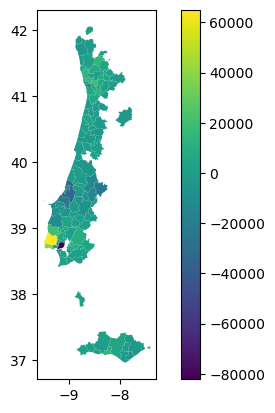

In [22]:
# For HiGH DENSITY region
  
desired_merge_data = portugal_mun[['DTMN', 'Total_Fechada_2010', 'Total_Fechada_2040']]

high_density = high_density.merge(desired_merge_data, right_on=['DTMN'], left_on=['DICO'], how='left')
high_density['surplus_2040'] = high_density['Total_Fechada_2040'] - high_density['Total_Fechada_2010']
high_density.plot(column='surplus_2040', legend=True)

In [23]:
# For LOW DENSITY region
 
joined_gdf = portugal_mun[portugal_mun.intersects(low_density.unary_union)]
joined_gdf['surplus_2040'] = joined_gdf['Total_Fechada_2040'] - joined_gdf['Total_Fechada_2010']
low_density = joined_gdf


/home/fillipe/anaconda3/envs/python_kepler_jupyter/lib/python3.11/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

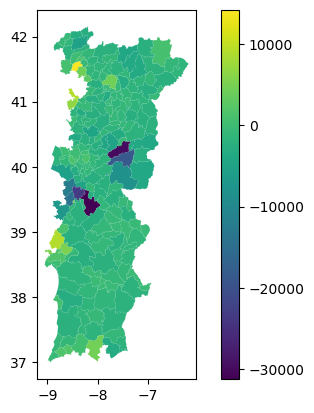

In [24]:
joined_gdf.plot('surplus_2040', legend=True)

In [25]:
portugal_mun_boundaries = portugal_mun.dissolve(by='NUTSI_COD')
high_density['join'] = 1
high_density_boundaries = high_density.dissolve(by='join')
joined_gdf_boundaries = joined_gdf.dissolve(by='NUTSI_COD')

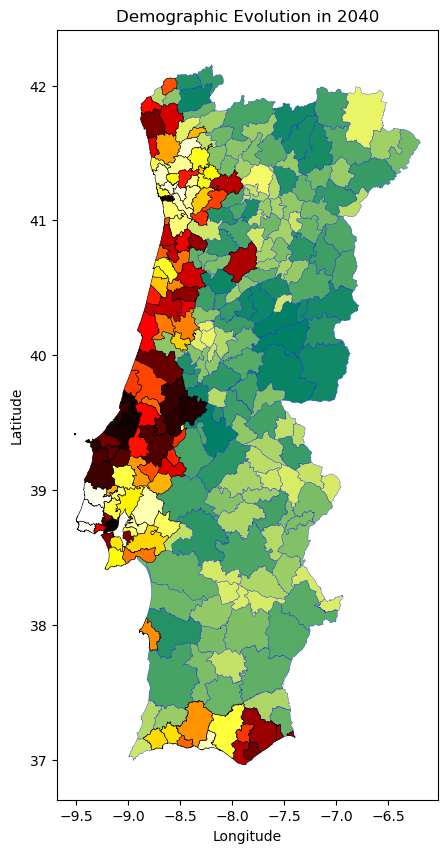

In [26]:


# Set up the plot
fig, ax = plt.subplots(figsize=(14, 10))


# Plot low-density municipalities
low_density.plot(ax=ax, column='surplus_2040', categorical=True,
                 cmap='summer', linewidth=0.2, edgecolor='blue')

# Plot high-density municipalities
high_density.plot(ax=ax, column='surplus_2040', categorical=True,
                  cmap='hot', linewidth=0.4, edgecolor='black')

# Customize the plot
ax.set_title('Demographic Evolution in 2040')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


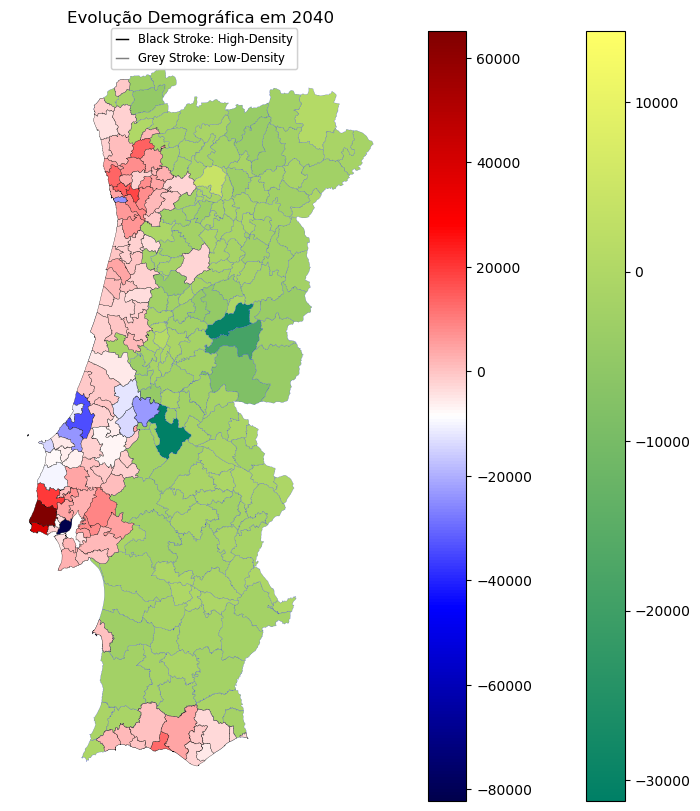

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming you have two geodataframes: high_density and low_density

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot low-density municipalities
low_density.plot(ax=ax, column='surplus_2040', cmap='summer', linewidth=0.1, edgecolor='blue', legend=True)

# Plot high-density municipalities
high_density.plot(ax=ax, column='surplus_2040', cmap='seismic', linewidth=0.2, edgecolor='black', legend=True)

# Customize the plot
ax.set_title('Evolução Demográfica em 2040')

# Remove frame lines showing map coordinates
ax.set_frame_on(False)
ax.axis('off')


# Create a custom legend for stroke municipalities
custom_legend = ax.legend(handles=[Line2D([], [], color='black', linewidth=1),
                                   Line2D([], [], color='grey', linewidth=1)],
                          labels=['Black Stroke: High-Density', 'Grey Stroke: Low-Density'], loc='upper left', fontsize='small', handlelength=1.1)

# Adjust the position of the legend
custom_legend.set_bbox_to_anchor((0.25, 1.011))
# Add the custom legends to the plot
ax.add_artist(custom_legend)



# Show the plot
plt.show()



In [28]:
low_density.to_file('data/low_density.geojson', driver='GeoJSON')
high_density.to_file('data/high_density.geojson', driver='GeoJSON')

In [29]:
# Join data with the density maps

portugal_mun.columns

Index(['key_0', 'DTMN', 'NUTSI_DSG', 'NUTSI_COD', 'NUTSII_DSG', 'NUTSII_COD',
       'NUTSIII_DSG', 'NUTSIII_COD', 'DISTRITO_ILHA_DSG', 'CONCELHO_DSG',
       'geometry', 'PopAbertH_2010', 'PopAbertM_2010', 'PopFechH_2010',
       'PopFechM_2010', 'Total_Aberta_2010', 'Total_Fechada_2010',
       'PopAbertH_2030', 'PopAbertM_2030', 'PopFechH_2030', 'PopFechM_2030',
       'Total_Aberta_2030', 'Total_Fechada_2030', 'PopAbertH_2040',
       'PopAbertM_2040', 'PopFechH_2040', 'PopFechM_2040', 'Total_Aberta_2040',
       'Total_Fechada_2040', 'ratio_2030', 'ratio_2040'],
      dtype='object')

In [30]:
low_density.columns

Index(['key_0', 'DTMN', 'NUTSI_DSG', 'NUTSI_COD', 'NUTSII_DSG', 'NUTSII_COD',
       'NUTSIII_DSG', 'NUTSIII_COD', 'DISTRITO_ILHA_DSG', 'CONCELHO_DSG',
       'geometry', 'PopAbertH_2010', 'PopAbertM_2010', 'PopFechH_2010',
       'PopFechM_2010', 'Total_Aberta_2010', 'Total_Fechada_2010',
       'PopAbertH_2030', 'PopAbertM_2030', 'PopFechH_2030', 'PopFechM_2030',
       'Total_Aberta_2030', 'Total_Fechada_2030', 'PopAbertH_2040',
       'PopAbertM_2040', 'PopFechH_2040', 'PopFechM_2040', 'Total_Aberta_2040',
       'Total_Fechada_2040', 'ratio_2030', 'ratio_2040', 'surplus_2040'],
      dtype='object')

In [31]:
high_density.columns

Index(['DICO', 'Concelho', 'Distrito', 'N_Freguesi', 'NUTSIII', 'NUTSII',
       'NUTSI', 'Alt_Max', 'Alt_Min', 'Area_ha', 'Perim_km', 'geometry',
       'DTMN', 'Total_Fechada_2010', 'Total_Fechada_2040', 'surplus_2040',
       'join'],
      dtype='object')

In [32]:
import numpy as np
portugal_mun['density'] = np.where(portugal_mun.index.isin(low_density.index), 'low', 'high')
portugal_mun['surplus_2040'] = portugal_mun['Total_Fechada_2040'] - portugal_mun['Total_Fechada_2010']


In [33]:
portugal_mun.columns


Index(['key_0', 'DTMN', 'NUTSI_DSG', 'NUTSI_COD', 'NUTSII_DSG', 'NUTSII_COD',
       'NUTSIII_DSG', 'NUTSIII_COD', 'DISTRITO_ILHA_DSG', 'CONCELHO_DSG',
       'geometry', 'PopAbertH_2010', 'PopAbertM_2010', 'PopFechH_2010',
       'PopFechM_2010', 'Total_Aberta_2010', 'Total_Fechada_2010',
       'PopAbertH_2030', 'PopAbertM_2030', 'PopFechH_2030', 'PopFechM_2030',
       'Total_Aberta_2030', 'Total_Fechada_2030', 'PopAbertH_2040',
       'PopAbertM_2040', 'PopFechH_2040', 'PopFechM_2040', 'Total_Aberta_2040',
       'Total_Fechada_2040', 'ratio_2030', 'ratio_2040', 'density',
       'surplus_2040'],
      dtype='object')

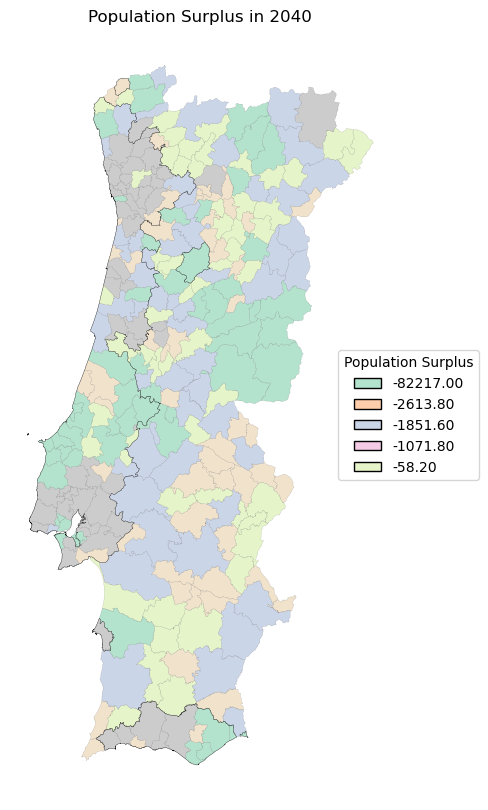

In [34]:

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the choropleth map with 5 quantiles
portugal_mun.plot(ax=ax, column='surplus_2040', cmap='Pastel2', linewidth=0.05, edgecolor='black', legend=True, scheme='quantiles', k=5)

# Plot the high-density boundaries without filling
high_density_boundaries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.2)

# Customize the plot
ax.set_title('Population Surplus in 2040')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Remove frame lines showing map coordinates
ax.set_frame_on(False)
ax.axis('off')

# Adjust plot layout
plt.subplots_adjust(right=0.85)

# Get the quantile values
quantile_values = portugal_mun['surplus_2040'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).tolist()
quantile_labels = ['{:.2f}'.format(q) for q in quantile_values]

# Create custom legend
colors = sns.color_palette('Pastel2', n_colors=5)
patches = [mpatches.Patch(facecolor=color, edgecolor='black', label=label) for color, label in zip(colors, quantile_labels)]

# Position the legend on the right side
ax.legend(handles=patches, title='Population Surplus', loc='center right', bbox_to_anchor=(1.25, 0.5))

# Show the plot
plt.show()


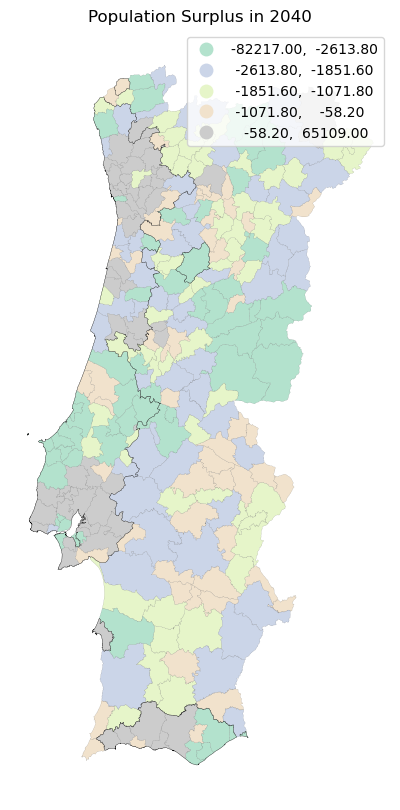

In [35]:
# Set up the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the choropleth map with 5 quantiles
portugal_mun.plot(ax=ax, column='surplus_2040', cmap='Pastel2', linewidth=0.05, edgecolor='black', legend=True, scheme='quantiles', k=5)

# Plot the high-density boundaries without filling
high_density_boundaries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.2)

# Customize the plot
ax.set_title('Population Surplus in 2040')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Remove frame lines showing map coordinates
ax.set_frame_on(False)
ax.axis('off')

# Show the plot
plt.show()

In [36]:
portugal_mun.surplus_2040.describe()

count      278.000000
mean     -1460.924460
std       8809.863197
min     -82217.000000
25%      -2400.500000
50%      -1438.000000
75%       -526.000000
max      65109.000000
Name: surplus_2040, dtype: float64

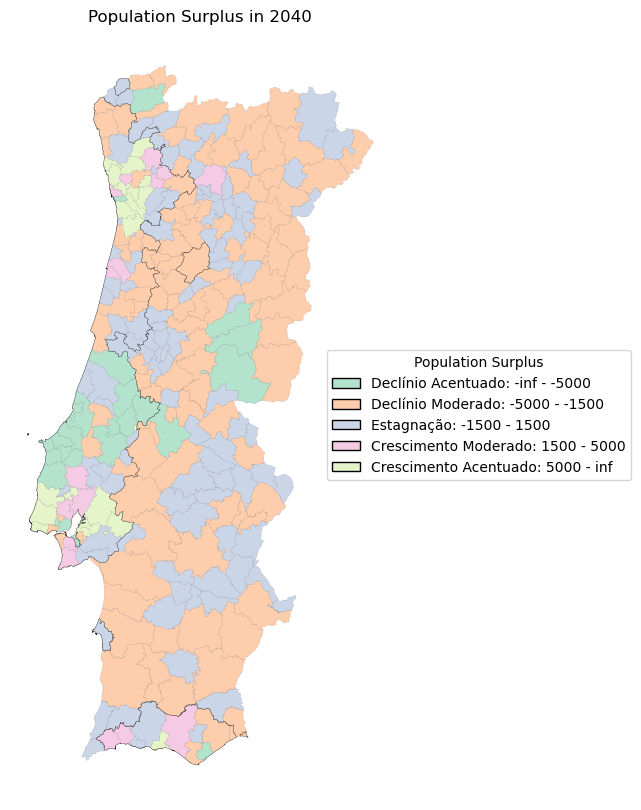

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors

# Assuming you have the portugal_mun GeoDataFrame and high_density_boundaries GeoDataFrame

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Define the classification and labels
classification = [-float('inf'), -5000, -1500, 1500, 5000, float('inf')]
labels = ['Declínio Acentuado', 'Declínio Moderado', 'Estagnação', 'Crescimento Moderado', 'Crescimento Acentuado']

# Classify the data based on 'surplus_2040'
portugal_mun['surplus_class'] = pd.cut(portugal_mun['surplus_2040'], bins=classification, labels=labels, right=False)

# Create custom colormap based on 'Pastel2'
pastel2_colors = sns.color_palette('Pastel2', len(labels))
pastel2_cmap = colors.ListedColormap(list(pastel2_colors))

# Plot the choropleth map with the classified data and custom colormap
portugal_mun.plot(ax=ax, column='surplus_class', cmap=pastel2_cmap, linewidth=0.05, edgecolor='black', legend=True)

# Plot the high-density boundaries without filling
high_density_boundaries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.2)

# Customize the plot
ax.set_title('Population Surplus in 2040')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Remove frame lines showing map coordinates
ax.set_frame_on(False)
ax.axis('off')

# Adjust plot layout
plt.subplots_adjust(right=0.85)

# Create custom legend with range labels and corresponding colors
legend_patches = []
for i in range(len(classification) - 1):
    if i == 2:  # Modify the 'Estagnação' class range
        estagnacao_range = f'{classification[i]} - {classification[i+1]}'
        estagnacao_label = f'{labels[i]}: {estagnacao_range}'
        legend_patch = mpatches.Patch(facecolor=pastel2_colors[i], edgecolor='black', label=estagnacao_label)
    else:
        legend_patch = mpatches.Patch(facecolor=pastel2_colors[i], edgecolor='black', label=f'{labels[i]}: {classification[i]} - {classification[i+1]}')
    legend_patches.append(legend_patch)

# Position the legend on the right side
plt.subplots_adjust(right=0.85)
ax.legend(handles=legend_patches, title='Population Surplus', loc='center right', bbox_to_anchor=(1.65, 0.5))

# Show the plot
plt.show()


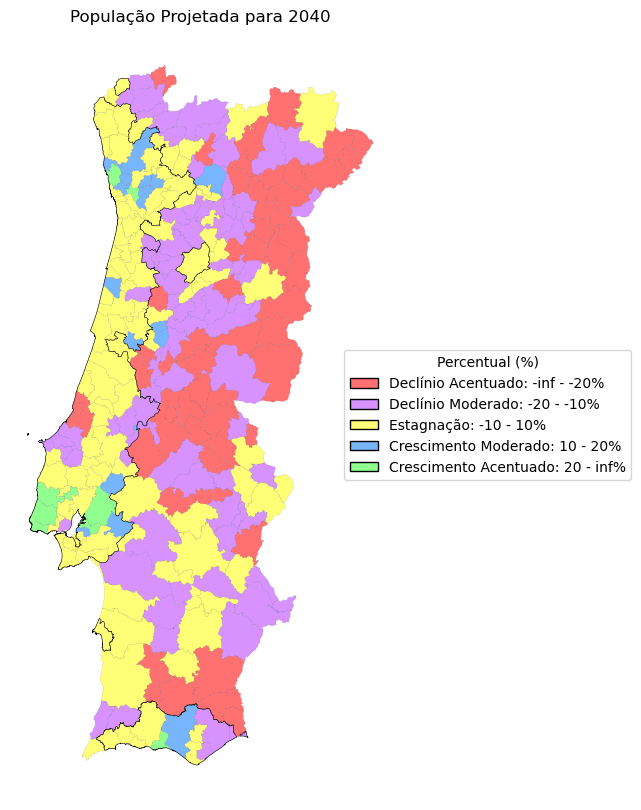

In [38]:

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Define the classification and labels for 'ratio_2040'
classification = [-float('inf'), -20, -10, 10, 20, float('inf')]
labels = ['Declínio Acentuado', 'Declínio Moderado', 'Estagnação', 'Crescimento Moderado', 'Crescimento Acentuado']

# Classify the data based on 'ratio_2040'
portugal_mun['ratio_class'] = pd.cut(portugal_mun['ratio_2040'], bins=classification, labels=labels, right=False)

# Define the custom colors for each label
custom_colors = ['#FF7070', '#D792FF', '#FFFF77', '#77B5FF', '#90FF90']
custom_cmap = colors.ListedColormap(custom_colors)

# Plot the choropleth map with the classified data and custom colormap
portugal_mun.plot(ax=ax, column='ratio_class', cmap=custom_cmap, linewidth=0.05, edgecolor='black', legend=True)

# Plot the high-density boundaries without filling
high_density_boundaries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.4)

# Customize the plot
ax.set_title('População Projetada para 2040')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Remove frame lines showing map coordinates
ax.set_frame_on(False)
ax.axis('off')

# Adjust plot layout
plt.subplots_adjust(right=0.85)

# Create custom legend with range labels and corresponding colors
legend_patches = []
for i in range(len(classification) - 1):
    if i == 2:  # Modify the 'Estagnação' class range
        estagnacao_range = f'{classification[i]} - {classification[i+1]}'
        estagnacao_label = f'{labels[i]}: {estagnacao_range}%'
        legend_patch = mpatches.Patch(facecolor=custom_colors[i], edgecolor='black', label=estagnacao_label)
    else:
        legend_patch = mpatches.Patch(facecolor=custom_colors[i], edgecolor='black', label=f'{labels[i]}: {classification[i]} - {classification[i+1]}%')
    legend_patches.append(legend_patch)

# Position the legend on the right side
plt.subplots_adjust(right=0.85)
ax.legend(handles=legend_patches, title='Percentual (%)', loc='center right', bbox_to_anchor=(1.65, 0.5))

# Show the plot
plt.show()
